In [1]:
# Nomes: Carla Lapa, Evelyn Bessa, Nezi Pimentel, Sandra Valcacer, Vitoria Almeida, Samira Souza
import os
from os import listdir
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns

import cv2
from matplotlib.image import imread

import tensorflow as tf
from keras.utils.np_utils import to_categorical
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


import glob
import PIL
import random

random.seed(100)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


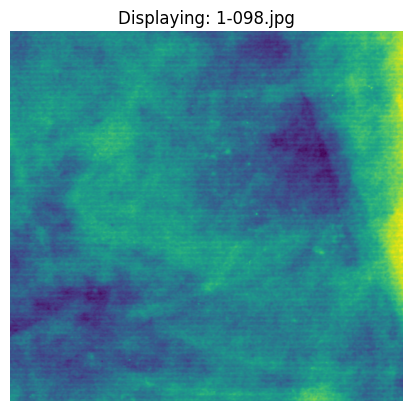

Successfully opened and displayed 1-098.jpg


In [2]:
from PIL import Image
import os
import matplotlib.pyplot as plt

dataset_name = 'cbis-ddsm-breast-cancer-image-dataset' # Example dataset name
subfolder_name = 'jpeg/1.3.6.1.4.1.9590.100.1.2.316322277110955049538295115662287535438'
image_filename = '1-098.jpg' # Example image filename

dataset_path = f'/kaggle/input/{dataset_name}/{subfolder_name}/'
image_path = os.path.join(dataset_path, image_filename)

try:
    img = Image.open(image_path)
    plt.imshow(img)
    plt.title(f'Displaying: {image_filename}')
    plt.axis('off')
    plt.show()
    print(f"Successfully opened and displayed {image_filename}")
except FileNotFoundError:
    print(f"Error: Image not found at {image_path}. Please check the path.")
except Exception as e:
    print(f"An error occurred: {e}")

In [3]:
# Nomes: Carla Lapa, Evelyn Bessa, Nezi Pimentel, Sandra Valcacer, Vitoria Almeida, Samira Souza
base_dir = "/kaggle/input/cbis-ddsm-breast-cancer-image-dataset"
image_dir = os.path.join(base_dir, "jpeg")

In [4]:
# Nomes: Carla Lapa, Evelyn Bessa, Nezi Pimentel, Sandra Valcacer, Vitoria Almeida, Samira Souza
dicom_data = pd.read_csv(f"{base_dir}/csv/dicom_info.csv")
calc_df = pd.read_csv(f"{base_dir}/csv/calc_case_description_train_set.csv")
mass_df = pd.read_csv(f"{base_dir}/csv/mass_case_description_train_set.csv")
calc_df_test = pd.read_csv(f"{base_dir}/csv/calc_case_description_test_set.csv")
mass_df_test = pd.read_csv(f"{base_dir}/csv/mass_case_description_test_set.csv")

In [5]:
# Nomes: Carla Lapa, Evelyn Bessa, Nezi Pimentel, Sandra Valcacer, Vitoria Almeida, Samira Souza
dicom_clean = dicom_data.copy()

cols_to_drop = [
    'PatientBirthDate','AccessionNumber','Columns','ContentDate','ContentTime',
    'PatientSex','ReferringPhysicianName','Rows','SOPClassUID','SOPInstanceUID',
    'StudyDate','StudyID','StudyTime','InstanceNumber',
    'SeriesNumber'
]

dicom_clean.drop(cols_to_drop, axis=1, inplace=True, errors='ignore')

dicom_clean['SeriesDescription'] = dicom_clean['SeriesDescription'].fillna(method='bfill')
dicom_clean['Laterality'] = dicom_clean['Laterality'].fillna(method='bfill')

In [6]:
# Nomes: Carla Lapa, Evelyn Bessa, Nezi Pimentel, Sandra Valcacer, Vitoria Almeida, Samira Souza
dicom_clean.head()

,file_path,image_path,BitsAllocated,BitsStored,BodyPartExamined,ConversionType,HighBit,LargestImagePixelValue,Laterality,Modality,...,PhotometricInterpretation,PixelRepresentation,SamplesPerPixel,SecondaryCaptureDeviceManufacturer,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SmallestImagePixelValue,SpecificCharacterSet,StudyInstanceUID
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,16,16,BREAST,WSD,15,65535,R,MG,...,MONOCHROME2,0,1,MathWorks,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,23078,ISO_IR 100,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,16,16,BREAST,WSD,15,65535,R,MG,...,MONOCHROME2,0,1,MathWorks,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,0,ISO_IR 100,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,16,16,BREAST,WSD,15,65535,R,MG,...,MONOCHROME2,0,1,MathWorks,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,0,ISO_IR 100,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,16,16,BREAST,WSD,15,65535,L,MG,...,MONOCHROME2,0,1,MathWorks,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,32298,ISO_IR 100,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,8,8,Left Breast,WSD,7,255,R,MG,...,MONOCHROME2,0,1,MathWorks,MATLAB,ROI mask images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,0,ISO_IR 100,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...


In [7]:
# Nomes: Carla Lapa, Evelyn Bessa, Nezi Pimentel, Sandra Valcacer, Vitoria Almeida, Samira Souza
calc = calc_df.copy()
calc = calc.rename(columns={
    'calc type':'calc_type',
    'calc distribution':'calc_distribution',
    'image view':'image_view',
    'left or right breast':'left_or_right_breast',
    'breast density':'breast_density',
    'abnormality type':'abnormality_type',
    'abnormality id': 'abnormality_id',
    'image file path': 'image_file_path',
    'cropped image file path': 'cropped_image_file_path',
    'ROI mask file path': 'ROI_mask_file_path'
})

# Converter para categorias
for col in ['pathology','calc_type','calc_distribution','abnormality_type',
            'image_view','left_or_right_breast']:
    if col in calc.columns:
        calc[col] = calc[col].astype('category')

calc['calc_type'].fillna(method='bfill', inplace=True)
calc['calc_distribution'].fillna(method='bfill', inplace=True)

In [8]:
# Nomes: Carla Lapa, Evelyn Bessa, Nezi Pimentel, Sandra Valcacer, Vitoria Almeida, Samira Souza
calc.head(5)

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,calc_type,calc_distribution,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00008,1,LEFT,CC,1,calcification,ROUND_AND_REGULAR-LUCENT_CENTER-DYSTROPHIC,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...


In [9]:
# Nomes: Carla Lapa, Evelyn Bessa, Nezi Pimentel, Sandra Valcacer, Vitoria Almeida, Samira Souza
mass = mass_df.copy()
mass = mass.rename(columns={
    'mass shape':'mass_shape',
    'mass margins':'mass_margins',
    'image view':'image_view',
    'left or right breast':'left_or_right_breast',
    'abnormality type':'abnormality_type',
    'abnormality id': 'abnormality_id',
    'image file path': 'image_file_path',
    'cropped image file path': 'cropped_image_file_path',
    'ROI mask file path': 'ROI_mask_file_path'
})

for col in ['mass_shape','mass_margins','pathology','abnormality_type',
            'image_view','left_or_right_breast']:
    if col in mass.columns:
        mass[col] = mass[col].astype('category')

mass['mass_shape'].fillna(method='bfill', inplace=True)
mass['mass_margins'].fillna(method='bfill', inplace=True)


In [10]:
# Nomes: Carla Lapa, Evelyn Bessa, Nezi Pimentel, Sandra Valcacer, Vitoria Almeida, Samira Souza
mass.head(5)

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


In [11]:
# Nomes: Carla Lapa, Evelyn Bessa, Nezi Pimentel, Sandra Valcacer, Vitoria Almeida, Samira Souza
calc_test = calc_df_test.copy()
calc_test = calc_test.rename(columns={
    'calc type':'calc_type',
    'calc distribution':'calc_distribution',
    'image view':'image_view',
    'left or right breast':'left_or_right_breast',
    'breast density':'breast_density',
    'abnormality type':'abnormality_type',
    'abnormality id': 'abnormality_id',
    'image file path': 'image_file_path',
    'cropped image file path': 'cropped_image_file_path',
    'ROI mask file path': 'ROI_mask_file_path'
})

# Converter para categorias
for col in ['pathology','calc_type','calc_distribution','abnormality_type',
            'image_view','left_or_right_breast']:
    if col in calc_test.columns:
        calc_test[col] = calc_test[col].astype('category')

calc_test['calc_type'].fillna(method='bfill', inplace=True)
calc_test['calc_distribution'].fillna(method='bfill', inplace=True)

In [12]:
# Nomes: Carla Lapa, Evelyn Bessa, Nezi Pimentel, Sandra Valcacer, Vitoria Almeida, Samira Souza
mass_test = mass_df_test.copy()
mass_test = mass_test.rename(columns={
    'mass shape':'mass_shape',
    'mass margins':'mass_margins',
    'image view':'image_view',
    'left or right breast':'left_or_right_breast',
    'abnormality type':'abnormality_type',
    'abnormality id': 'abnormality_id',
    'image file path': 'image_file_path',
    'cropped image file path': 'cropped_image_file_path',
    'ROI mask file path': 'ROI_mask_file_path'
})

for col in ['mass_shape','mass_margins','pathology','abnormality_type',
            'image_view','left_or_right_breast']:
    if col in mass_test.columns:
        mass_test[col] = mass_test[col].astype('category')

mass_test['mass_shape'].fillna(method='bfill', inplace=True)
mass_test['mass_margins'].fillna(method='bfill', inplace=True)


In [13]:
# Nomes: Carla Lapa, Evelyn Bessa, Nezi Pimentel, Sandra Valcacer, Vitoria Almeida, Samira Souza
full_df = pd.concat([calc, calc_test, mass, mass_test], ignore_index=True)

In [14]:
# Nomes: Carla Lapa, Evelyn Bessa, Nezi Pimentel, Sandra Valcacer, Vitoria Almeida, Samira Souza
full_df.head()

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,calc_type,calc_distribution,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path,mass_shape,mass_margins
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,NaN,NaN
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,NaN,NaN
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,NaN,NaN
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,NaN,NaN
4,P_00008,1,LEFT,CC,1,calcification,ROUND_AND_REGULAR-LUCENT_CENTER-DYSTROPHIC,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,NaN,NaN


In [15]:
# Nomes: Carla Lapa, Evelyn Bessa, Nezi Pimentel, Sandra Valcacer, Vitoria Almeida, Samira Souza
#checking common patients and pathologies between both dataframes 
common_patient_ids = calc[calc['patient_id'].isin(mass['patient_id']) &
                          calc['patient_id'].isin(calc_test['patient_id']) &
                          calc['patient_id'].isin(mass_test['patient_id'])]['patient_id']
# common_patient_ids = calc[calc['patient_id'].isin(mass['patient_id'])]['patient_id']
print(common_patient_ids)

Series([], Name: patient_id, dtype: object)


In [16]:
# Nomes: Carla Lapa, Evelyn Bessa, Nezi Pimentel, Sandra Valcacer, Vitoria Almeida, Samira Souza
#this patient have both abnormality types
full_df[full_df['patient_id'] == 'P_00034']['cropped_image_file_path'][49]

'Calc-Training_P_00034_RIGHT_CC_2/1.3.6.1.4.1.9590.100.1.2.161403010412163078237192669872827688964/1.3.6.1.4.1.9590.100.1.2.40204365512880018321779759940450653990/000001.dcm\n'

In [17]:
# Nomes: Carla Lapa, Evelyn Bessa, Nezi Pimentel, Sandra Valcacer, Vitoria Almeida, Samira Souza
def map_pathology(p):
    if p == "MALIGNANT":
        return 1
    else:
        return 0

full_df['label'] = full_df['pathology'].apply(map_pathology)

In [18]:
dicom_clean.head()

,file_path,image_path,BitsAllocated,BitsStored,BodyPartExamined,ConversionType,HighBit,LargestImagePixelValue,Laterality,Modality,...,PhotometricInterpretation,PixelRepresentation,SamplesPerPixel,SecondaryCaptureDeviceManufacturer,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SmallestImagePixelValue,SpecificCharacterSet,StudyInstanceUID
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,16,16,BREAST,WSD,15,65535,R,MG,...,MONOCHROME2,0,1,MathWorks,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,23078,ISO_IR 100,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,16,16,BREAST,WSD,15,65535,R,MG,...,MONOCHROME2,0,1,MathWorks,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,0,ISO_IR 100,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,16,16,BREAST,WSD,15,65535,R,MG,...,MONOCHROME2,0,1,MathWorks,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,0,ISO_IR 100,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,16,16,BREAST,WSD,15,65535,L,MG,...,MONOCHROME2,0,1,MathWorks,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,32298,ISO_IR 100,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,8,8,Left Breast,WSD,7,255,R,MG,...,MONOCHROME2,0,1,MathWorks,MATLAB,ROI mask images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,0,ISO_IR 100,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...


In [19]:
import os
import pandas as pd

def extract_uids(path):
    """
    Extrai:
    - dicom_patient_id  → ex: Calc-Training_P_00005_RIGHT_CC_1
    - study_uid         → ex: 1.3.6.1.4.1.xxxxx... (primeiro UID)
    - series_uid        → ex: 1.3.6.1.4.1.yyyyy... (segundo UID)
    - filename          → ex: 000001.dcm
    """
    if pd.isna(path):
        return None, None, None, None
    
    parts = path.strip().split("/")
    
    if len(parts) < 4:
        return None, None, None, None
    
    dicom_patient_id = parts[0]
    study_uid        = parts[1]
    series_uid       = parts[2]
    filename         = parts[3]

    return dicom_patient_id, study_uid, series_uid, filename

full_df["dicom_patient_id"] = full_df["cropped_image_file_path"].apply(lambda x: extract_uids(x)[0])
full_df["study_uid"]        = full_df["cropped_image_file_path"].apply(lambda x: extract_uids(x)[1])
full_df["series_uid"]       = full_df["cropped_image_file_path"].apply(lambda x: extract_uids(x)[2])
full_df["dicom_filename"]   = full_df["cropped_image_file_path"].apply(lambda x: extract_uids(x)[3])

# Remover entradas inválidas
full_df = full_df[full_df["dicom_patient_id"].notna()]

print("full_df com UIDs extraídos:", len(full_df))
full_df['mass_shape'] = full_df['mass_shape'].fillna(method='bfill')
full_df['mass_margins'] = full_df['mass_margins'].fillna(method='bfill')

dicom_key_cols = ["PatientID", "StudyInstanceUID", "SeriesInstanceUID", "image_path", "SeriesDescription"]

dicom_clean_sub = dicom_clean[dicom_key_cols].copy()

dicom_clean_sub = dicom_clean_sub.rename(columns={
    "PatientID": "dicom_patient_id",
    "StudyInstanceUID": "study_uid",
    "SeriesInstanceUID": "series_uid",
    "image_path": "dicom_jpeg_path"
})

print("dicom_clean pronto para merge:", len(dicom_clean_sub))


merged_df = pd.merge(
    full_df,
    dicom_clean_sub,
    on=["dicom_patient_id", "study_uid", "series_uid"],
    how="left"
)

print("Merged entries:", len(merged_df))
print("JPEG real encontrado em:", merged_df["dicom_jpeg_path"].notna().sum())

print(merged_df[["dicom_jpeg_path", "pathology", "label"]].head())


full_df com UIDs extraídos: 3568
dicom_clean pronto para merge: 10237
Merged entries: 6711
JPEG real encontrado em: 6710
                                     dicom_jpeg_path  pathology  label
0  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.393344...  MALIGNANT      1
1  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.393344...  MALIGNANT      1
2  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.296281...  MALIGNANT      1
3  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.296281...  MALIGNANT      1
4  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.314135...     BENIGN      0


In [20]:
#merged_df.head()
#dicom_clean_sub[dicom_clean_sub['series_uid'] == '1.3.6.1.4.1.9590.100.1.2.393344010211719049419601138200355094682']
#full_df[full_df['patient_id'] == 'P_00034']['cropped_image_file_path'][49]
merged_df[merged_df['patient_id'] == 'P_00034']
#merged_df[merged_df['series_uid'] == '1.3.6.1.4.1.9590.100.1.2.40204365512880018321779759940450653990']
#1.3.6.1.4.1.9590.100.1.2.40204365512880018321779759940450653990

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,calc_type,calc_distribution,assessment,pathology,...,ROI_mask_file_path,mass_shape,mass_margins,label,dicom_patient_id,study_uid,series_uid,dicom_filename,dicom_jpeg_path,SeriesDescription
98,P_00034,3,RIGHT,CC,2,calcification,PLEOMORPHIC,CLUSTERED,4,MALIGNANT,...,Calc-Training_P_00034_RIGHT_CC_2/1.3.6.1.4.1.9...,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,1,Calc-Training_P_00034_RIGHT_CC_2,1.3.6.1.4.1.9590.100.1.2.161403010412163078237...,1.3.6.1.4.1.9590.100.1.2.402043655128800183217...,000001.dcm,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.402043...,cropped images
99,P_00034,3,RIGHT,CC,2,calcification,PLEOMORPHIC,CLUSTERED,4,MALIGNANT,...,Calc-Training_P_00034_RIGHT_CC_2/1.3.6.1.4.1.9...,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,1,Calc-Training_P_00034_RIGHT_CC_2,1.3.6.1.4.1.9590.100.1.2.161403010412163078237...,1.3.6.1.4.1.9590.100.1.2.402043655128800183217...,000001.dcm,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.402043...,ROI mask images
100,P_00034,3,RIGHT,MLO,2,calcification,PLEOMORPHIC,CLUSTERED,4,MALIGNANT,...,Calc-Training_P_00034_RIGHT_MLO_2/1.3.6.1.4.1....,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,1,Calc-Training_P_00034_RIGHT_MLO_2,1.3.6.1.4.1.9590.100.1.2.314756926311256422439...,1.3.6.1.4.1.9590.100.1.2.240307055812982365934...,000001.dcm,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.240307...,cropped images
101,P_00034,3,RIGHT,MLO,2,calcification,PLEOMORPHIC,CLUSTERED,4,MALIGNANT,...,Calc-Training_P_00034_RIGHT_MLO_2/1.3.6.1.4.1....,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,1,Calc-Training_P_00034_RIGHT_MLO_2,1.3.6.1.4.1.9590.100.1.2.314756926311256422439...,1.3.6.1.4.1.9590.100.1.2.240307055812982365934...,000001.dcm,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.240307...,ROI mask images
3462,P_00034,3,RIGHT,CC,1,mass,NaN,NaN,5,MALIGNANT,...,Mass-Training_P_00034_RIGHT_CC_1/1.3.6.1.4.1.9...,IRREGULAR,SPICULATED,1,Mass-Training_P_00034_RIGHT_CC_1,1.3.6.1.4.1.9590.100.1.2.367023324511786004333...,1.3.6.1.4.1.9590.100.1.2.335868980512870398813...,000000.dcm,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.335868...,ROI mask images
3463,P_00034,3,RIGHT,CC,1,mass,NaN,NaN,5,MALIGNANT,...,Mass-Training_P_00034_RIGHT_CC_1/1.3.6.1.4.1.9...,IRREGULAR,SPICULATED,1,Mass-Training_P_00034_RIGHT_CC_1,1.3.6.1.4.1.9590.100.1.2.367023324511786004333...,1.3.6.1.4.1.9590.100.1.2.335868980512870398813...,000000.dcm,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.335868...,cropped images
3464,P_00034,3,RIGHT,MLO,1,mass,NaN,NaN,5,MALIGNANT,...,Mass-Training_P_00034_RIGHT_MLO_1/1.3.6.1.4.1....,IRREGULAR,SPICULATED,1,Mass-Training_P_00034_RIGHT_MLO_1,1.3.6.1.4.1.9590.100.1.2.421313371712173228306...,1.3.6.1.4.1.9590.100.1.2.359413664411847701707...,000000.dcm,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.359413...,ROI mask images
3465,P_00034,3,RIGHT,MLO,1,mass,NaN,NaN,5,MALIGNANT,...,Mass-Training_P_00034_RIGHT_MLO_1/1.3.6.1.4.1....,IRREGULAR,SPICULATED,1,Mass-Training_P_00034_RIGHT_MLO_1,1.3.6.1.4.1.9590.100.1.2.421313371712173228306...,1.3.6.1.4.1.9590.100.1.2.359413664411847701707...,000000.dcm,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.359413...,cropped images


In [21]:
merged_df.count()

patient_id                 6711
breast_density             6711
left_or_right_breast       6711
image_view                 6711
abnormality_id             6711
abnormality_type           6711
calc_type                  3422
calc_distribution          3422
assessment                 6711
pathology                  6711
subtlety                   6711
image_file_path            6711
cropped_image_file_path    6711
ROI_mask_file_path         6711
mass_shape                 6711
mass_margins               6711
label                      6711
dicom_patient_id           6711
study_uid                  6711
series_uid                 6711
dicom_filename             6711
dicom_jpeg_path            6710
SeriesDescription          6710
dtype: int64

In [22]:
filtered_df = merged_df[ merged_df["SeriesDescription"] == "cropped images" ].copy()
print(filtered_df["SeriesDescription"].value_counts())
print(len(filtered_df))

SeriesDescription
cropped images    3566
Name: count, dtype: int64
3566


In [23]:
filtered_df.head()

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,calc_type,calc_distribution,assessment,pathology,...,ROI_mask_file_path,mass_shape,mass_margins,label,dicom_patient_id,study_uid,series_uid,dicom_filename,dicom_jpeg_path,SeriesDescription
1,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,1,Calc-Training_P_00005_RIGHT_CC_1,1.3.6.1.4.1.9590.100.1.2.328778919012412769218...,1.3.6.1.4.1.9590.100.1.2.393344010211719049419...,000001.dcm,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.393344...,cropped images
3,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,1,Calc-Training_P_00005_RIGHT_MLO_1,1.3.6.1.4.1.9590.100.1.2.675123622103196361081...,1.3.6.1.4.1.9590.100.1.2.296281207812130400303...,000001.dcm,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.296281...,cropped images
4,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,0,Calc-Training_P_00007_LEFT_CC_1,1.3.6.1.4.1.9590.100.1.2.241202057913673145232...,1.3.6.1.4.1.9590.100.1.2.314135871111943890422...,000001.dcm,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.314135...,cropped images
7,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,0,Calc-Training_P_00007_LEFT_MLO_1,1.3.6.1.4.1.9590.100.1.2.314250272911170289203...,1.3.6.1.4.1.9590.100.1.2.914582796124855152034...,000001.dcm,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.914582...,cropped images
9,P_00008,1,LEFT,CC,1,calcification,ROUND_AND_REGULAR-LUCENT_CENTER-DYSTROPHIC,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,0,Calc-Training_P_00008_LEFT_CC_1,1.3.6.1.4.1.9590.100.1.2.336811694512764490002...,1.3.6.1.4.1.9590.100.1.2.281397494612871934937...,000001.dcm,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.281397...,cropped images


In [24]:
filtered_df[filtered_df['patient_id'] == 'P_00034']['dicom_jpeg_path'][98]

'CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.40204365512880018321779759940450653990/1-240.jpg'

In [25]:
filtered_df.isnull().sum()

patient_id                    0
breast_density                0
left_or_right_breast          0
image_view                    0
abnormality_id                0
abnormality_type              0
calc_type                  1696
calc_distribution          1696
assessment                    0
pathology                     0
subtlety                      0
image_file_path               0
cropped_image_file_path       0
ROI_mask_file_path            0
mass_shape                    0
mass_margins                  0
label                         0
dicom_patient_id              0
study_uid                     0
series_uid                    0
dicom_filename                0
dicom_jpeg_path               0
SeriesDescription             0
dtype: int64

In [26]:
filtered_df['mass_shape'] = filtered_df['mass_shape'].fillna(method='bfill')
filtered_df['mass_margins'] = filtered_df['mass_margins'].fillna(method='bfill')
filtered_df['calc_type'] = filtered_df['calc_type'].fillna(method='bfill')
filtered_df['calc_distribution'] = filtered_df['calc_distribution'].fillna(method='bfill')

In [27]:
cols_to_drop = [
    'dicom_filename','image_file_path','cropped_image_file_path','ROI_mask_file_path',
]

filtered_df.drop(cols_to_drop, axis=1, inplace=True, errors='ignore')

In [28]:
print(filtered_df['abnormality_type'].value_counts())
print(filtered_df['label'].value_counts())
print(filtered_df['image_view'].value_counts())

abnormality_type
calcification    1870
mass             1696
Name: count, dtype: int64
label
0    2110
1    1456
Name: count, dtype: int64
image_view
MLO    1894
CC     1672
Name: count, dtype: int64


# Optuning

In [29]:
!pip install optuna
!pip install optuna-integration

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 5.6 MB/s eta 0:00:00


In [30]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetV2M
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import optuna
from optuna.integration import TFKerasPruningCallback

df = filtered_df.copy()
df = df[df["dicom_jpeg_path"].notna()] 
df['filepath'] = df['dicom_jpeg_path'].str.replace('CBIS-DDSM', base_dir)

print("Amostras válidas:", len(df))

Amostras válidas: 3566


In [31]:
df["label"] = df["label"].astype(str)
X_paths = df["filepath"].values
y_labels = df["label"].values.astype(int)

In [32]:
import optuna
from sklearn.model_selection import StratifiedKFold
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetV2M
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import Callback

class EpochProgressCallback(Callback):
    def __init__(self, trial_number, fold_number):
        super().__init__()
        self.trial_number = trial_number
        self.fold_number = fold_number

    def on_epoch_begin(self, epoch, logs=None):
        print(f"[Trial {self.trial_number} | Fold {self.fold_number}] "
              f"Iniciando epoch {epoch + 1}")

    def on_epoch_end(self, epoch, logs=None):
        print(f"[Trial {self.trial_number} | Fold {self.fold_number}] "
              f"Epoch {epoch + 1} — loss={logs.get('loss'):.4f}, "
              f"acc={logs.get('accuracy'):.4f}, "
              f"val_loss={logs.get('val_loss'):.4f}, "
              f"val_acc={logs.get('val_accuracy'):.4f}")


def build_model(unfreeze_ratio, optimizer_name, lr, dropout):
    base = EfficientNetV2M(weights="imagenet", include_top=False, input_shape=(512, 512, 3))
    base.trainable = False

    if unfreeze_ratio > 0:
        n_layers = len(base.layers)
        n_unfreeze = int(n_layers * unfreeze_ratio)
        for layer in base.layers[-n_unfreeze:]:
            layer.trainable = True

    x = layers.GlobalAveragePooling2D()(base.output)
    x = layers.Dropout(dropout)(x)
    out = layers.Dense(1, activation="sigmoid")(x)

    model = models.Model(inputs=base.input, outputs=out)

    if optimizer_name == "adamw":
        optimizer = optimizers.AdamW(learning_rate=lr)
    elif optimizer_name == "adam":
        optimizer = optimizers.Adam(learning_rate=lr)
    elif optimizer_name == "rmsprop":
        optimizer = optimizers.RMSprop(learning_rate=lr)

    model.compile(
        optimizer=optimizer,
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model


def build_datagen():
    return ImageDataGenerator(
        rescale=1./255,
        rotation_range=15,
        horizontal_flip=True,
        zoom_range=0.10,
        width_shift_range=0.05,
        height_shift_range=0.05,
        fill_mode="nearest"
    )

def build_test_datagen():
    return ImageDataGenerator(rescale=1./255)

def objective(trial):

    unfreeze_ratio = trial.suggest_categorical("unfreeze_ratio", [0.2, 0.4, 0.6, 1.0])
    batch_size = trial.suggest_categorical("batch_size", [8, 12])
    optimizer_name = trial.suggest_categorical("optimizer", ["adamw", "adam", "rmsprop"])
    lr = trial.suggest_float("lr", 1e-5, 5e-4, log=True)
    dropout = trial.suggest_float("dropout", 0.0, 0.5)
    epochs = trial.suggest_int("epochs", 3, 10)

    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    fold_accuracies = []

    X = np.array(X_paths)
    y = np.array(y_labels)

    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
        print(f"\n========== Trial {trial.number} — Fold {fold+1} ==========")

        train_gen = build_datagen().flow_from_dataframe(
            dataframe=df.iloc[train_idx],
            x_col="filepath",
            y_col="label",
            target_size=(512, 512),
            class_mode="binary",
            batch_size=batch_size,
            shuffle=True
        )

        val_gen = build_test_datagen().flow_from_dataframe(
            dataframe=df.iloc[val_idx],
            x_col="filepath",
            y_col="label",
            target_size=(512, 512),
            class_mode="binary",
            batch_size=batch_size,
            shuffle=False
        )

        model = build_model(unfreeze_ratio, optimizer_name, lr, dropout)

        # callback para ver progresso
        progress_callback = EpochProgressCallback(
            trial_number=trial.number,
            fold_number=fold + 1
        )

        history = model.fit(
            train_gen,
            validation_data=val_gen,
            epochs=epochs,
            verbose=0,  # mute do Keras (deixa apenas nosso callback aparecer)
            callbacks=[progress_callback]
        )

        best_acc = max(history.history["val_accuracy"])
        fold_accuracies.append(best_acc)

    return np.mean(fold_accuracies)


In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=8)

print("Melhores parâmetros:", study.best_params)
print("Melhor score:", study.best_value)

# Treinamento com EfficientNetV2 Medium

In [ ]:
UNFREEZE_RATIO = 1.0
BATCH_SIZE = 8
LR = 0.000305
DROPOUT = 0.17436
EPOCHS = 100 
IMG_SIZE = 384
N_FOLDS = 3

In [ ]:
def build_model(lr=LR, dropout=DROPOUT, unfreeze_ratio=UNFREEZE_RATIO):

    base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2M(
        include_top=False,
        input_shape=(IMG_SIZE, IMG_SIZE, 3),
        weights="imagenet",
        pooling=None
    )

    total_layers = len(base_model.layers)
    unfreeze_until = int(total_layers * unfreeze_ratio)

    # Congela parte inicial da rede (se ratio < 1)
    for i, layer in enumerate(base_model.layers):
        layer.trainable = (i >= (total_layers - unfreeze_until))

    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x = tf.keras.applications.efficientnet_v2.preprocess_input(inputs)
    x = base_model(x, training=True)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(dropout)(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)

    model = models.Model(inputs, outputs)

    # AdamW otimizado
    optimizer = tf.keras.optimizers.AdamW(learning_rate=lr)

    model.compile(
        optimizer=optimizer,
        loss="binary_crossentropy",
        metrics=[
            tf.keras.metrics.BinaryAccuracy(name="accuracy"),
            tf.keras.metrics.AUC(name="auc"),
            tf.keras.metrics.Precision(name="precision"),
            tf.keras.metrics.Recall(name="recall")
        ]
    )

    return model

In [ ]:
def build_datagen():
    return ImageDataGenerator(
        rescale=1./255,
        horizontal_flip=True,
        vertical_flip=True,
        rotation_range=8,
        width_shift_range=0.05,
        height_shift_range=0.05,
        brightness_range=[0.9, 1.1]
    )

In [ ]:
skf = StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=42)

final_preds = []
final_labels = []

for fold, (train_idx, val_idx) in enumerate(skf.split(df, df["label"])):
    print(f"\n==================== Fold {fold+1}/{N_FOLDS} ====================")

    train_df = df.iloc[train_idx].reset_index(drop=True)
    val_df = df.iloc[val_idx].reset_index(drop=True)

    # Data generators
    train_gen = build_datagen().flow_from_dataframe(
        train_df,
        x_col="filepath",
        y_col="label",
        target_size=(IMG_SIZE, IMG_SIZE),
        class_mode="binary",
        batch_size=BATCH_SIZE,
        shuffle=True
    )

    val_gen = ImageDataGenerator(rescale=1./255).flow_from_dataframe(
        val_df,
        x_col="filepath",
        y_col="label",
        target_size=(IMG_SIZE, IMG_SIZE),
        class_mode="binary",
        batch_size=BATCH_SIZE,
        shuffle=False
    )

    # Monta o modelo
    model = build_model()

    # Callbacks
    ckpt_path = f"best_model_fold{fold+1}.h5"
    
    callbacks = [
        EarlyStopping(
            monitor="val_auc",
            patience=5,
            mode="max",
            restore_best_weights=True
        ),
        ModelCheckpoint(
            ckpt_path,
            monitor="val_auc",
            mode="max",
            save_best_only=True,
            verbose=1
        ),
        ReduceLROnPlateau(
            monitor="val_loss",
            factor=0.5,
            patience=3,
            verbose=1
        )
    ]

    # Treinamento
    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=EPOCHS,
        callbacks=callbacks,
        verbose=1
    )

    # Predições do fold
    preds = model.predict(val_gen).ravel()
    final_preds.extend(preds)
    final_labels.extend(val_df["label"].values)

    tf.keras.backend.clear_session()

In [33]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd


final_preds_bin = (np.array(final_preds) >= 0.5).astype(int)
final_labels_arr = np.array(final_labels)

print("\n==================== Resultados Finais (K-Fold) ====================\n")
print(classification_report(final_labels_arr, final_preds_bin, digits=4))

print("F1-score:", f1_score(final_labels_arr, final_preds_bin))
print("Recall:", recall_score(final_labels_arr, final_preds_bin))
print("Precision:", precision_score(final_labels_arr, final_preds_bin))
print("AUC:", roc_auc_score(final_labels_arr, final_preds))


==================== Fold 1/3 ====================
Found 2377 validated image filenames belonging to 2 classes.
Found 1189 validated image filenames belonging to 2 classes.
214201816/214201816 [==============================] - 1s 0us/step
Epoch 1/100


2025-12-02 12:05:57.328558: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/efficientnetv2-m/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


298/298 [==============================] - ETA: 0s - loss: 0.6539 - accuracy: 0.6113 - auc: 0.6319 - precision: 0.5333 - recall: 0.3794

2025-12-02 12:09:09.219008: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/efficientnetv2-m/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer



Epoch 1: val_auc improved from -inf to 0.63531, saving model to best_model_fold1.h5
298/298 [==============================] - 267s 456ms/step - loss: 0.6539 - accuracy: 0.6113 - auc: 0.6319 - precision: 0.5333 - recall: 0.3794 - val_loss: 0.6428 - val_accuracy: 0.6114 - val_auc: 0.6353 - val_precision: 0.5432 - val_recall: 0.3107 - lr: 3.0500e-04
Epoch 2/100
298/298 [==============================] - ETA: 0s - loss: 0.6412 - accuracy: 0.6188 - auc: 0.6514 - precision: 0.5494 - recall: 0.3670
Epoch 2: val_auc did not improve from 0.63531
298/298 [==============================] - 128s 429ms/step - loss: 0.6412 - accuracy: 0.6188 - auc: 0.6514 - precision: 0.5494 - recall: 0.3670 - val_loss: 0.6646 - val_accuracy: 0.6056 - val_auc: 0.6165 - val_precision: 0.5326 - val_recall: 0.2860 - lr: 3.0500e-04
Epoch 3/100
298/298 [==============================] - ETA: 0s - loss: 0.6305 - accuracy: 0.6332 - auc: 0.6672 - precision: 0.5803 - recall: 0.3649
Epoch 3: val_auc did not improve from 0.6

2025-12-02 12:56:55.334077: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/efficientnetv2-m/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


149/149 [==============================] - 21s 109ms/step

==================== Fold 2/3 ====================
Found 2377 validated image filenames belonging to 2 classes.
Found 1189 validated image filenames belonging to 2 classes.
Epoch 1/100


2025-12-02 12:58:14.687891: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/efficientnetv2-m/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


298/298 [==============================] - ETA: 0s - loss: 0.6528 - accuracy: 0.6138 - auc: 0.6348 - precision: 0.5317 - recall: 0.4573

2025-12-02 13:01:21.346256: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/efficientnetv2-m/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer



Epoch 1: val_auc improved from -inf to 0.60263, saving model to best_model_fold2.h5
298/298 [==============================] - 258s 459ms/step - loss: 0.6528 - accuracy: 0.6138 - auc: 0.6348 - precision: 0.5317 - recall: 0.4573 - val_loss: 0.6542 - val_accuracy: 0.6030 - val_auc: 0.6026 - val_precision: 0.5215 - val_recall: 0.3258 - lr: 3.0500e-04
Epoch 2/100
298/298 [==============================] - ETA: 0s - loss: 0.6224 - accuracy: 0.6399 - auc: 0.6782 - precision: 0.5760 - recall: 0.4490
Epoch 2: val_auc improved from 0.60263 to 0.65172, saving model to best_model_fold2.h5
298/298 [==============================] - 131s 441ms/step - loss: 0.6224 - accuracy: 0.6399 - auc: 0.6782 - precision: 0.5760 - recall: 0.4490 - val_loss: 0.6471 - val_accuracy: 0.6392 - val_auc: 0.6517 - val_precision: 0.5814 - val_recall: 0.4124 - lr: 3.0500e-04
Epoch 3/100
298/298 [==============================] - ETA: 0s - loss: 0.6167 - accuracy: 0.6344 - auc: 0.6874 - precision: 0.5687 - recall: 0.4346


2025-12-02 13:58:12.054033: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/efficientnetv2-m/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


149/149 [==============================] - 21s 110ms/step

==================== Fold 3/3 ====================
Found 2378 validated image filenames belonging to 2 classes.
Found 1188 validated image filenames belonging to 2 classes.
Epoch 1/100


2025-12-02 13:59:35.813243: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/efficientnetv2-m/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


298/298 [==============================] - ETA: 0s - loss: 0.6640 - accuracy: 0.5833 - auc: 0.5940 - precision: 0.4858 - recall: 0.3522

2025-12-02 14:02:41.992860: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/efficientnetv2-m/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer



Epoch 1: val_auc improved from -inf to 0.62100, saving model to best_model_fold3.h5
298/298 [==============================] - 262s 456ms/step - loss: 0.6640 - accuracy: 0.5833 - auc: 0.5940 - precision: 0.4858 - recall: 0.3522 - val_loss: 0.6754 - val_accuracy: 0.5833 - val_auc: 0.6210 - val_precision: 0.4896 - val_recall: 0.4845 - lr: 3.0500e-04
Epoch 2/100
298/298 [==============================] - ETA: 0s - loss: 0.6469 - accuracy: 0.6148 - auc: 0.6361 - precision: 0.5459 - recall: 0.3368
Epoch 2: val_auc did not improve from 0.62100
298/298 [==============================] - 129s 432ms/step - loss: 0.6469 - accuracy: 0.6148 - auc: 0.6361 - precision: 0.5459 - recall: 0.3368 - val_loss: 0.6802 - val_accuracy: 0.5909 - val_auc: 0.5997 - val_precision: 0.4930 - val_recall: 0.0722 - lr: 3.0500e-04
Epoch 3/100
298/298 [==============================] - ETA: 0s - loss: 0.6361 - accuracy: 0.6253 - auc: 0.6628 - precision: 0.5473 - recall: 0.4768
Epoch 3: val_auc improved from 0.62100 to

KeyboardInterrupt: 